In [1]:
from quantum_gates.metrics import hellinger_distance
import numpy as np
from numpy import savetxt,loadtxt
import matplotlib.pyplot as plt

In [2]:
r00_ideal = [1,0] * 1000
r11_ideal = [0,1] * 1000

savetxt('r00_X_IDEAL.txt', r00_ideal)
savetxt('r11_X_IDEAL.txt', r11_ideal)

In [2]:
#Compute the Hellinger distance of Fourier pulse device and Ideal result

r00_ideal = loadtxt('r00_X_IDEAL.txt')
r11_ideal = loadtxt('r11_X_IDEAL.txt')
r00_dev = loadtxt('r00_X_DEVICE_1.txt')
r11_dev = loadtxt('r11_X_DEVICE_1.txt')


Hell_fourier = []

for i in range(0,100):
    
    p_ideal = [r00_ideal[i],r11_ideal[i]]

    p_dev = [r00_dev[i],r11_dev[i]]

    Hell_fourier.append(hellinger_distance(p_ideal,p_dev,1))

savetxt('hellinger_X_fourier_device_1.txt', Hell_fourier)

In [3]:
#Compute the Hellinger distance of standard pulse device and Ideal result

r00_ideal = loadtxt('r00_X_IDEAL.txt')
r11_ideal = loadtxt('r11_X_IDEAL.txt')
r00_dev = loadtxt('r00_X_DEVICE_standard_1.txt')
r11_dev = loadtxt('r11_X_DEVICE_standard_1.txt')


Hell_fourier = []

for i in range(0,100):
    
    p_ideal = [r00_ideal[i],r11_ideal[i]]

    p_dev = [r00_dev[i],r11_dev[i]]

    Hell_fourier.append(hellinger_distance(p_ideal,p_dev,1))

savetxt('hellinger_X_standard_device_1.txt', Hell_fourier)

In [5]:
# Compute relative improvement NG constant vs IBM by using Ideal as target

Np = 100

Hell_fourier = loadtxt('hellinger_X_fourier_device_1.txt')

Hell_standard = loadtxt('hellinger_X_standard_device_1.txt')

R = []

for i in range(1, Np):
    
    R.append(np.absolute(Hell_fourier[i] - Hell_standard[i]) / Hell_standard[i])

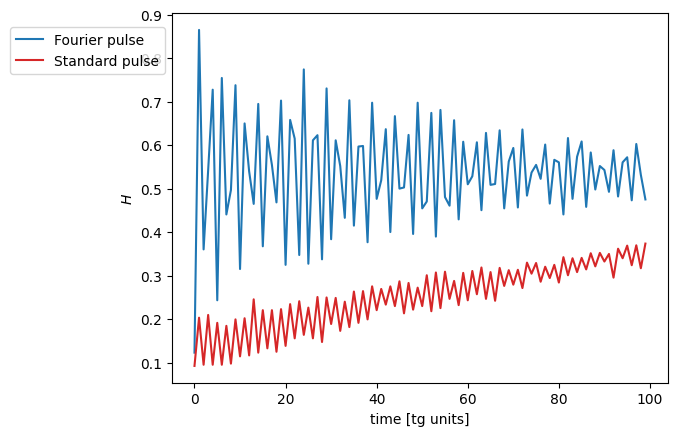

In [4]:
#Plots of the average Hellinger distance of Noisy Gates and IBM with Lindblad

Np = 100

mean_hellinger_fourier = loadtxt('hellinger_X_fourier_device_1.txt')
#std_hellinger_ng_lindblad = loadtxt('std_hellinger_CX_NG_lin.txt')

mean_hellinger_standard = loadtxt('hellinger_X_standard_device_1.txt')
#std_hellinger_ibm_lindblad = loadtxt('std_hellinger_CX_ibm_lindblad.txt')


n = np.linspace(0,Np-1,Np)

plt.plot(n,mean_hellinger_fourier[0:Np],color='tab:blue',label='Fourier pulse')
#plt.scatter(n,mean_hellinger_fourier[0:Np],color='tab:blue')

plt.plot(n,mean_hellinger_standard[0:Np],color='tab:red',label='Standard pulse')
#plt.scatter(n,mean_hellinger_constant[0:Np],color='tab:red')

plt.xlabel("time [tg units]")
plt.ylabel("$H$")

plt.legend(bbox_to_anchor =(0,0.98),loc="upper right")

#savefig("Hellinger_QFT_poster.png",format='png',dpi=100,bbox_inches='tight')
plt.show()

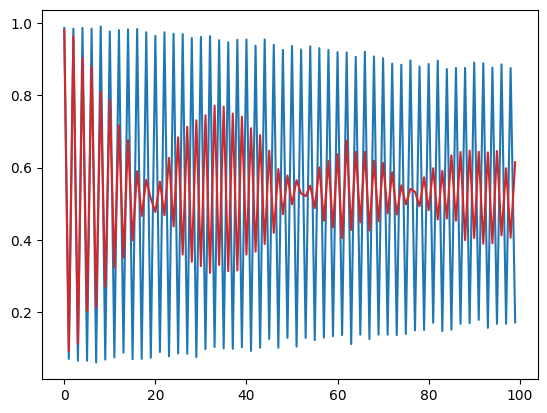

In [7]:
#Plots of the average Hellinger distance of Noisy Gates and IBM with Lindblad

Np = 100

r00 = loadtxt('r00_X_DEVICE_gauss.txt')

#r00_stand = loadtxt('r00_X_DEVICE_standard_1.txt')

r00_gauss = loadtxt('r00_X_DEVICE_cost.txt')

n = np.linspace(0,Np-1,Np)

plt.plot(n,r00[0:Np],color='tab:blue',label='Fourier pulse')

#plt.plot(n,r00_gauss[0:Np],color='tab:green',label='Drag pulse')

plt.plot(n,r00_gauss[0:Np],color='tab:red',label='Standard pulse')

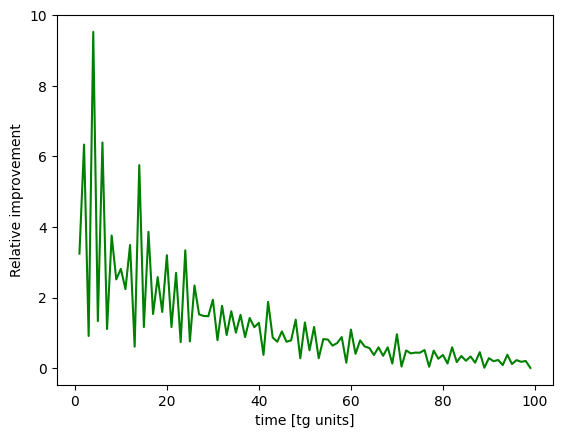

In [22]:
Np = 100

n = np.linspace(1,Np-1,Np-1)

plt.plot(n,R[0:Np-1],color='green')
#plt.scatter(n,R[0:Np-1],color='green')

plt.xlabel("time [tg units]")
plt.ylabel("Relative improvement")

#plt.savefig("CX_relative_improv_device.pdf",format='pdf',dpi=100,bbox_inches='tight')

plt.show()

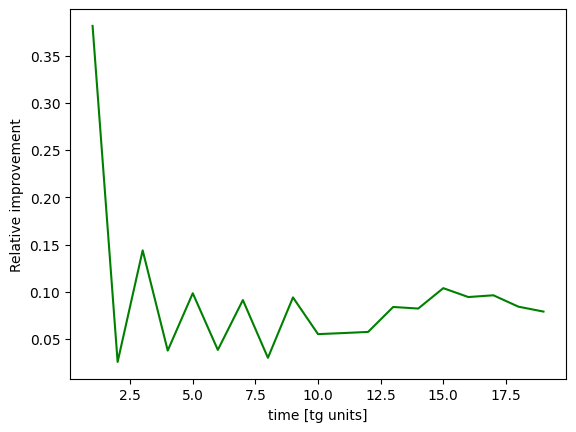

In [16]:
Np = 20

n = np.linspace(1,Np-1,Np-1)

plt.plot(n,S[0:Np-1],color='green')
#plt.scatter(n,R[0:Np-1],color='green')

plt.xlabel("time [tg units]")
plt.ylabel("Relative improvement")

#plt.savefig("CX_relative_improv_device.pdf",format='pdf',dpi=100,bbox_inches='tight')

plt.show()

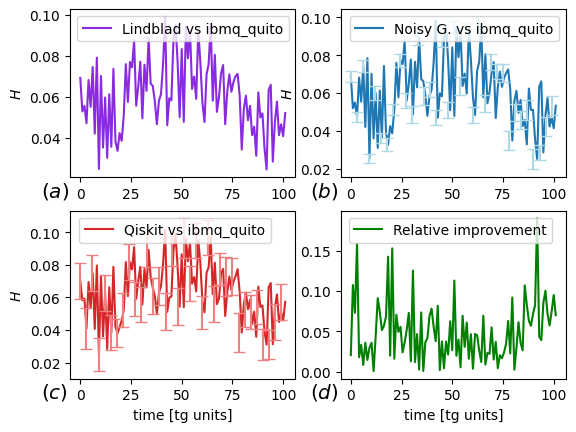

In [28]:
Np = 100

n = np.linspace(0,Np+1,Np)

Hell_lindblad_device = loadtxt('hellinger_CX_lindblad_device.txt')

mean_hellinger_ibm_device = loadtxt('mean_hellinger_CX_ibm_device.txt')
std_hellinger_ibm_device = loadtxt('std_hellinger_CX_ibm_device.txt')

mean_hellinger_ng_device = loadtxt('mean_hellinger_CX_NG_device.txt')
std_hellinger_ng_device = loadtxt('std_hellinger_CX_NG_device.txt')

plt.subplot(221)

plt.plot(n,Hell_lindblad_device[0:Np],color='blueviolet',label='Lindblad vs ibmq_quito')

#plt.xlabel("time [tg units]")
plt.ylabel("$H$")
#title("Hellinger")
plt.legend(bbox_to_anchor =(1,1),loc="upper right")


plt.subplot(222)

plt.plot(n,mean_hellinger_ng_device[0:Np],color='tab:blue',label='Noisy G. vs ibmq_quito')
#plt.scatter(n,mean_hellinger_ng_device[0:Np],color='tab:blue')

for j in range(0,Np,3):
    
    plt.errorbar(j,mean_hellinger_ng_device[j:j+1],yerr=std_hellinger_ng_device[j:j+1],linestyle='None',capsize=4,color='tab:blue',ecolor='lightblue')

#plt.xlabel("time [tg units]")
plt.ylabel("$H$")

plt.legend(bbox_to_anchor =(1,1),loc="upper right")


plt.subplot(223)

plt.plot(n,mean_hellinger_ibm_device[0:Np],color='tab:red',label='Qiskit vs ibmq_quito')
#plt.scatter(n,mean_hellinger_ibm_device[0:Np],color='pink',label='IBM vs device')

#for j in range(0,Np,3):
    
    #plt.errorbar(j,mean_hellinger_ng_device[j:j+1],yerr=std_hellinger_ng_device[j:j+1],linestyle='None',capsize=4,color='tab:blue',ecolor='lightblue')

for j in range(0,Np,3):
    
    plt.errorbar(j,mean_hellinger_ibm_device[j:j+1],yerr=std_hellinger_ibm_device[j:j+1],linestyle='None',capsize=4,color='tab:red',ecolor='lightcoral')

plt.xlabel("time [tg units]")
plt.ylabel("$H$")

plt.legend(bbox_to_anchor =(0.92,1),loc="upper right")


plt.subplot(224)

plt.plot(n,S,color='green', label='Relative improvement')
#plt.scatter(n,S,color='green')

plt.xlabel("time [tg units]")
#plt.ylabel("Relative improvement")
plt.legend(bbox_to_anchor =(0.97,1),loc="upper right")

a = '(a)'  #notice escaped slash
plt.figtext(0.08, 0.49,'$%s$'%a, fontsize='x-large')

b = '(b)'  #notice escaped slash
plt.figtext(0.5, 0.49,'$%s$'%b, fontsize='x-large')

c = '(c)'  #notice escaped slash
plt.figtext(0.08, 0.07,'$%s$'%c, fontsize='x-large')

d = '(d)'  #notice escaped slash
plt.figtext(0.5, 0.07,'$%s$'%d, fontsize='x-large')
    
plt.savefig("CX_all_hellinger_plots.pdf",format='pdf',dpi=100,bbox_inches='tight')
plt.show()

In [29]:
tcnot = loadtxt('t_cnot.txt')[0,1]

T1c = loadtxt('T1.txt')[0]
T2c = loadtxt('T2.txt')[0]

T1t = loadtxt('T1.txt')[1]
T2t = loadtxt('T2.txt')[1]


pdt = loadtxt('p_cnot.txt')[0,1] 

Tr_c = T1c / tcnot
Td_c = T2c/tcnot

Tr_t = T1t / tcnot
Td_t = T2t/tcnot

Tdep = 1/pdt

print(Tr_t)
print(Td_t)
#print(Tr_c)
#print(Td_c)
print(Tdep)

510.8859503016515
550.3188504552752
152.2202187154106


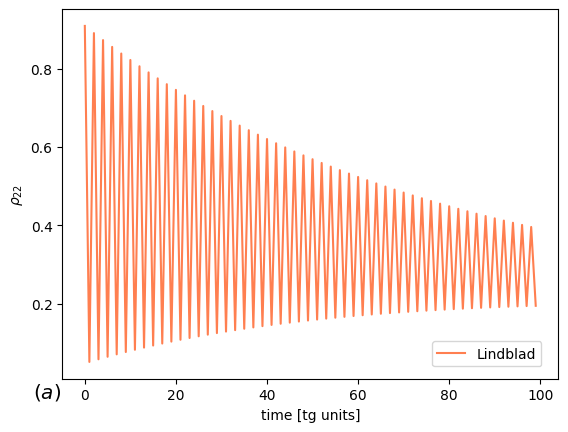

In [4]:
# Plot of numerical solution of Lindblad of r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)
r22_meq = loadtxt('r22_CX_LINDBLAD.txt')

plt.plot(t,r22_meq[0:Np],color='coral')
#plt.scatter(t,r22_meq[0:Np],color='coral')
#plt.axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#plt.axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#plt.axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")



legend1 = plt.legend(["Lindblad"],bbox_to_anchor=(0.98, 0.12))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

a = '(a)'  #notice escaped slash
plt.figtext(0.08, 0.07,'$%s$'%a, fontsize='x-large')

plt.savefig("Plot_r22_CX_lindblad_%d.pdf",format='pdf',dpi=100,bbox_inches='tight')

plt.show() 

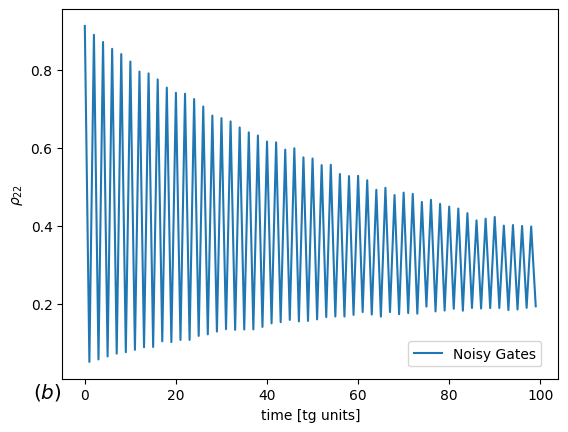

In [5]:
# Plot of Noisy Gates r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)
r22_ng = loadtxt('r22_CX_NG_40.txt')

plt.plot(t,r22_ng[0:Np],color='tab:blue')
#plt.scatter(t,r22_meq[0:Np],color='coral')
#plt.axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#plt.axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#plt.axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")


legend1 = plt.legend(["Noisy Gates"],bbox_to_anchor=(0.98, 0.12))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

a = '(b)'  #notice escaped slash
plt.figtext(0.08, 0.07,'$%s$'%a, fontsize='x-large')

plt.savefig("Plot_r22_CX_ng_%d.pdf",format='pdf',dpi=100,bbox_inches='tight')

plt.show() 

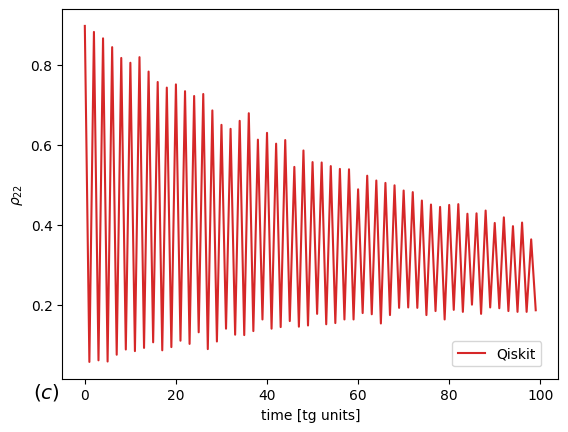

In [6]:
# Plot of IBM r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)

k = 40

r22_ibm = []

for i in range(0,100):
    
    p_ibm = loadtxt('CX_%d_IBM_%d.txt'%(i,k))
    r22_ibm.append(p_ibm[2])

plt.plot(t,r22_ibm[0:Np],color='tab:red')
#plt.scatter(t,r22_meq[0:Np],color='coral')
#plt.axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#plt.axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#plt.axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")


legend1 = plt.legend(["Qiskit"],bbox_to_anchor=(0.98, 0.12))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

a = '(c)'  #notice escaped slash
plt.figtext(0.08, 0.07,'$%s$'%a, fontsize='x-large')

plt.savefig("Plot_r22_CX_ibm_%d.pdf",format='pdf',dpi=100,bbox_inches='tight')

plt.show() 

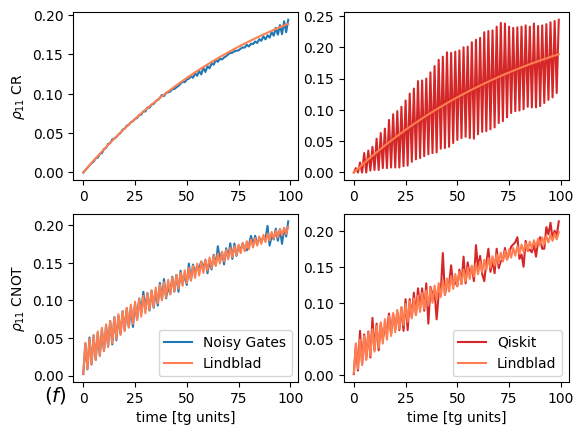

In [9]:
t = np.linspace(0,Np-1,Np)

r11_meq_CR = loadtxt('r11_CR_master_eq.txt')

r11_meq_CX = loadtxt('r11_CX_LINDBLAD.txt')

plt.subplot(221)

r11_ng_CR = loadtxt('mean_rho11_CR_ng_40.txt')
plt.plot(t,r11_ng_CR [0:Np],color='tab:blue')

plt.plot(t,r11_meq_CR[0:Np],color='coral')

#plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{11}$ CR")

plt.subplot(222)

r11_ibm_CR = loadtxt('mean_rho11_CR_ibm_40.txt')
plt.plot(t,r11_ibm_CR [0:Np],color='tab:red')

plt.plot(t,r11_meq_CR[0:Np],color='coral')



plt.subplot(224)


r11_ibm_CX = []

k = 40


for i in range(0,100):
    
    p_ibm = loadtxt('CX_%d_IBM_%d.txt'%(i,k))
    r11_ibm_CX.append(p_ibm[1])
    
plt.plot(t,r11_ibm_CX[0:Np],color='tab:red', label='Qiskit')

plt.plot(t,r11_meq_CX[0:Np],color='coral',label='Lindblad')

plt.legend(bbox_to_anchor =(1,0.35),loc="upper right")

plt.xlabel("time [tg units]")


plt.subplot(223)

r11_ng_CX = loadtxt('r11_CX_NG_40.txt')
plt.plot(t,r11_ng_CX[0:Np],color='tab:blue',label='Noisy Gates')

plt.plot(t,r11_meq_CX[0:Np],color='coral',label='Lindblad')

plt.legend(bbox_to_anchor =(1,0.35),loc="upper right")

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{11}$ CNOT")

a = '(f)'  #notice escaped slash
plt.figtext(0.08, 0.07,'$%s$'%a, fontsize='x-large')
    
plt.savefig("Plot_r11_CR_CX.pdf",format='pdf',dpi=100,bbox_inches='tight')
plt.show()

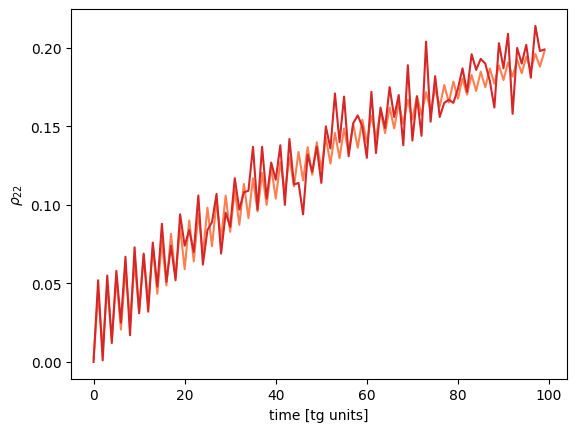

In [136]:
# Plot of IBM simulation of r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)

r22_ibm = []

k = 36

r22_meq = loadtxt('r11_CX_LINDBLAD.txt')
plt.plot(t,r22_meq[0:Np],color='coral')

for i in range(0,100):
    
    p_ibm = loadtxt('CX_%d_IBM_%d.txt'%(i,k))
    r22_ibm.append(p_ibm[1])
    


plt.plot(t,r22_ibm[0:Np],color='tab:red')
#plt.scatter(t,r22_device[0:Np],color='tab:green')
#axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")

#legend1 = plt.legend(["Lindblad"],bbox_to_anchor=(0.85, 0.1))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

#savefig("Plot_r22_meq_%d.pdf"%Nr,format='pdf',dpi=100,bbox_inches='tight')

plt.show()  

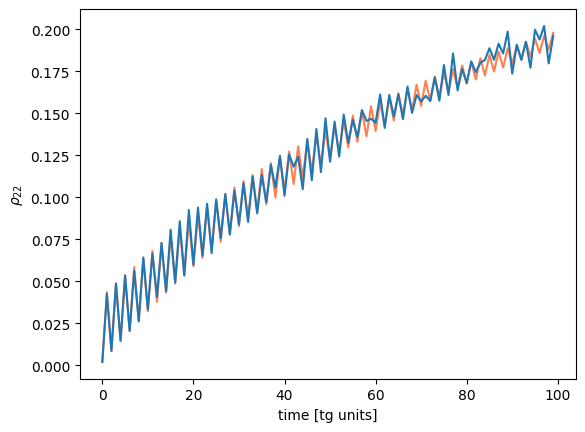

In [15]:
# Plot of numerical solution of Lindblad of r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)


r22_meq = loadtxt('r11_CX_LINDBLAD.txt')
plt.plot(t,r22_meq[0:Np],color='coral')

r22_ng = loadtxt('r11_CX_NG_26.txt')
plt.plot(t,r22_ng[0:Np],color='tab:blue')
#plt.scatter(t,r22_meq[0:Np],color='coral')
#axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")



#legend1 = plt.legend(["Lindblad"],bbox_to_anchor=(0.85, 0.1))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

#savefig("Plot_r22_meq_%d.pdf"%Nr,format='pdf',dpi=100,bbox_inches='tight')

plt.show() 

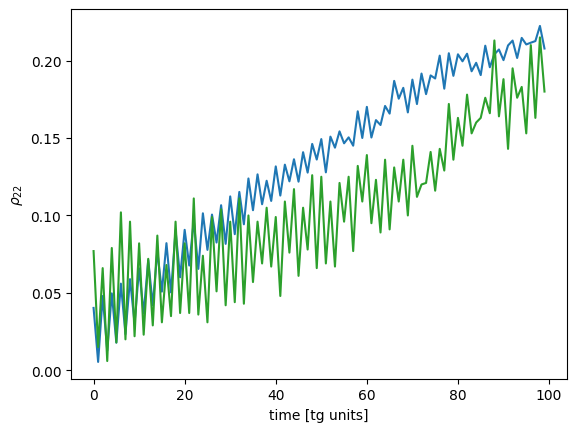

In [4]:
# Plot of device run of r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)

r22_device = []

for k in range(0,100):
    
    p_device = loadtxt('CX_%d_DEVICE.txt'%k)
    r22_device.append(p_device[0])
    
r22_ng = loadtxt('r00_CX_NG_0.txt')
plt.plot(t,r22_ng[0:Np],color='tab:blue')    


plt.plot(t,r22_device[0:Np],color='tab:green')
#plt.scatter(t,r22_device[0:Np],color='tab:green')
#axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")

#legend1 = plt.legend(["Lindblad"],bbox_to_anchor=(0.85, 0.1))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

#savefig("Plot_r22_meq_%d.pdf"%Nr,format='pdf',dpi=100,bbox_inches='tight')

plt.show() 

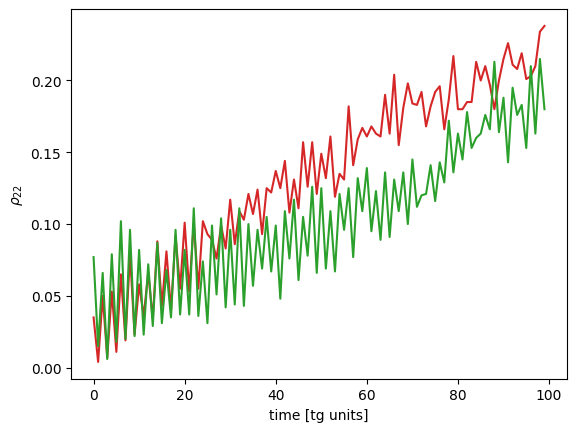

In [140]:
# Plot of device run of r22 entry

Np = 100


t = np.linspace(0,Np-1,Np)

r22_device = []
r22_ibm = []

for k in range(0,100):
    
    p_device = loadtxt('CX_%d_DEVICE.txt'%k)
    r22_device.append(p_device[0])
    
k = 98
for i in range(0,100):
    
    p_ibm = loadtxt('CX_%d_IBM_%d.txt'%(i,k))
    r22_ibm.append(p_ibm[0]) 

plt.plot(t,r22_ibm[0:Np],color='tab:red')
plt.plot(t,r22_device[0:Np],color='tab:green')
#plt.scatter(t,r22_device[0:Np],color='tab:green')
#axvline(Tr_t,color='green',linestyle='dashed',label='$T_1$')
#axvline(Td_t,color='gold',linestyle='dashed',label='$T_2$')
#axvline(Tdep,color='tab:grey',linestyle='dashed',label='$T_d$')

plt.xlabel("time [tg units]")
plt.ylabel("$\u03C1_{22}$")

#legend1 = plt.legend(["Lindblad"],bbox_to_anchor=(0.85, 0.1))
#legend2 = legend(bbox_to_anchor =(0.8,1),loc="upper right")

#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

#savefig("Plot_r22_meq_%d.pdf"%Nr,format='pdf',dpi=100,bbox_inches='tight')

plt.show() 